In [1]:
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt

In [2]:
my_feature = ([1.0, 2.0,  3.0,  4.0,  5.0,  6.0,  7.0,  8.0,  9.0, 10.0, 11.0, 12.0])
my_label   = ([5.0, 8.8,  9.6, 14.2, 18.8, 19.5, 21.4, 26.8, 28.9, 32.0, 33.8, 38.2])

In [4]:
#@title Define the functions that build and train a model
def build_model(my_learning_rate):
  """Create and compile a simple linear regression model."""
  # Most simple tf.keras models are sequential. 
  # A sequential model contains one or more layers.
  model = tf.keras.models.Sequential()

  # Describe the topography of the model.
  # The topography of a simple linear regression model
  # is a single node in a single layer. 
  model.add(tf.keras.layers.Dense(units=1, 
                                  input_shape=(1,)))

  # Compile the model topography into code that 
  # TensorFlow can efficiently execute. Configure 
  # training to minimize the model's mean squared error. 
  model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=my_learning_rate),
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.RootMeanSquaredError()])

  return model           


def train_model(model, feature, label, epochs, batch_size):
  """Train the model by feeding it data."""

  # Feed the feature values and the label values to the 
  # model. The model will train for the specified number 
  # of epochs, gradually learning how the feature values
  # relate to the label values. 
  history = model.fit(x=feature,
                      y=label,
                      batch_size=batch_size,
                      epochs=epochs)

  # Gather the trained model's weight and bias.
  trained_weight = model.get_weights()[0]
  trained_bias = model.get_weights()[1]

  # The list of epochs is stored separately from the 
  # rest of history.
  epochs = history.epoch
  
  # Gather the history (a snapshot) of each epoch.
  hist = pd.DataFrame(history.history)

  # Specifically gather the model's root mean 
  #squared error at each epoch. 
  rmse = hist["root_mean_squared_error"]

  return trained_weight, trained_bias, epochs, rmse

print("Defined create_model and train_model")

Defined create_model and train_model


In [6]:
#@title Define the plotting functions
def plot_the_model(trained_weight, trained_bias, feature, label):
  """Plot the trained model against the training feature and label."""

  # Label the axes.
  plt.xlabel("feature")
  plt.ylabel("label")

  # Plot the feature values vs. label values.
  plt.scatter(feature, label)

  # Create a red line representing the model. The red line starts
  # at coordinates (x0, y0) and ends at coordinates (x1, y1).
  x0 = 0
  y0 = trained_bias
  x1 = feature[-1]
  y1 = trained_bias + (trained_weight * x1)
  plt.plot([x0, x1], [y0, y1], c='r')

  # Render the scatter plot and the red line.
  plt.show()

def plot_the_loss_curve(epochs, rmse):
  """Plot the loss curve, which shows loss vs. epoch."""

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Root Mean Squared Error")

  plt.plot(epochs, rmse, label="Loss")
  plt.legend()
  plt.ylim([rmse.min()*0.97, rmse.max()])
  plt.show()

print("Defined the plot_the_model and plot_the_loss_curve functions.")

Defined the plot_the_model and plot_the_loss_curve functions.


Epoch 1/10
1/1 [==============================] - 0s 378ms/step - loss: 708.9814 - root_mean_squared_error: 26.6267
Epoch 2/10
1/1 [==============================] - 0s 8ms/step - loss: 695.1567 - root_mean_squared_error: 26.3658
Epoch 3/10
1/1 [==============================] - 0s 9ms/step - loss: 685.2590 - root_mean_squared_error: 26.1775
Epoch 4/10
1/1 [==============================] - 0s 7ms/step - loss: 677.0493 - root_mean_squared_error: 26.0202
Epoch 5/10
1/1 [==============================] - 0s 7ms/step - loss: 669.8185 - root_mean_squared_error: 25.8809
Epoch 6/10
1/1 [==============================] - 0s 6ms/step - loss: 663.2377 - root_mean_squared_error: 25.7534
Epoch 7/10
1/1 [==============================] - 0s 7ms/step - loss: 657.1242 - root_mean_squared_error: 25.6344
Epoch 8/10
1/1 [==============================] - 0s 7ms/step - loss: 651.3642 - root_mean_squared_error: 25.5218
Epoch 9/10
1/1 [==============================] - 0s 7ms/step - loss: 645.8816 - root_

C:\Users\snkty\anaconda3\envs\PythonData\lib\site-packages\numpy\core\_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


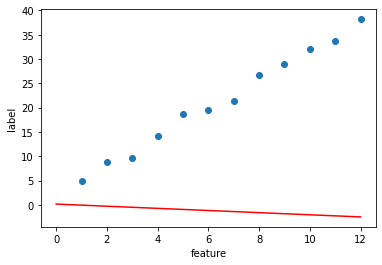

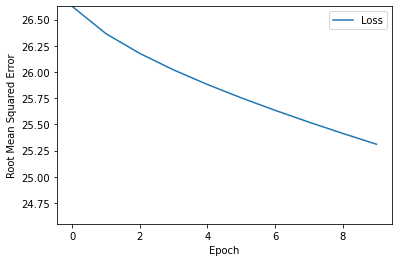

In [7]:
learning_rate=0.01
epochs=10
my_batch_size=12

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, 
                                                         my_label, epochs,
                                                         my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

Task 1: Examine the graphs
Examine the top graph. The blue dots identify the actual data; the red line identifies the output of the trained model. Ideally, the red line should align nicely with the blue dots. Does it? Probably not.

A certain amount of randomness plays into training a model, so you'll get somewhat different results every time you train. That said, unless you are an extremely lucky person, the red line probably doesn't align nicely with the blue dots.

Examine the bottom graph, which shows the loss curve. Notice that the loss curve decreases but doesn't flatten out, which is a sign that the model hasn't trained sufficiently.

Task 2: Increase the number of epochs
Training loss should steadily decrease, steeply at first, and then more slowly. Eventually, training loss should eventually stay steady (zeroslope or nearly zero slope), which indicates that training has converged.

In Task 1, the training loss did not converge. One possible solution is to train for more epochs. Your task is to increase the number of epochs sufficiently to get the model to converge. However, it is inefficient to train past convergence, so don't just set the number of epochs to an arbitrarily high value.

Examine the loss curve. Does the model converge?


C:\Users\snkty\anaconda3\envs\PythonData\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/25
1/1 [==============================] - 0s 399ms/step - loss: 144.6718 - root_mean_squared_error: 12.0280
Epoch 2/25
1/1 [==============================] - 0s 14ms/step - loss: 138.4808 - root_mean_squared_error: 11.7678
Epoch 3/25
1/1 [==============================] - 0s 7ms/step - loss: 134.1206 - root_mean_squared_error: 11.5810
Epoch 4/25
1/1 [==============================] - 0s 8ms/step - loss: 130.5467 - root_mean_squared_error: 11.4257
Epoch 5/25
1/1 [==============================] - 0s 7ms/step - loss: 127.4301 - root_mean_squared_error: 11.2885
Epoch 6/25
1/1 [==============================] - 0s 7ms/step - loss: 124.6188 - root_mean_squared_error: 11.1633
Epoch 7/25
1/1 [==============================] - 0s 8ms/step - loss: 122.0282 - root_mean_squared_error: 11.0466
Epoch 8/25
1/1 [==============================] - 0s 5ms/step - loss: 119.6061 - root_mean_squared_error: 10.9365
Epoch 9/25
1/1 [==============================] - 0s 8ms/step - loss: 117.3174 - root

C:\Users\snkty\anaconda3\envs\PythonData\lib\site-packages\numpy\core\_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


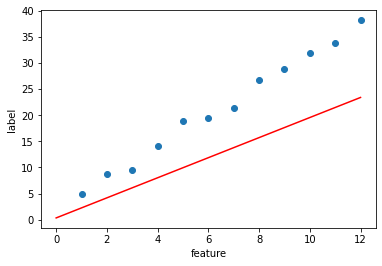

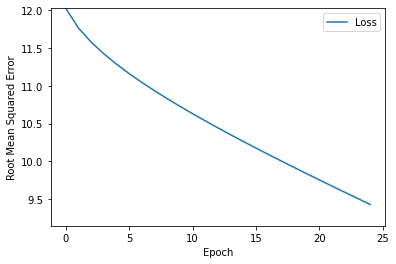

In [8]:
learning_rate=0.01
epochs= 25  # Replace ? with an integer.
my_batch_size=12

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, 
                                                        my_label, epochs,
                                                        my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

C:\Users\snkty\anaconda3\envs\PythonData\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/450
1/1 [==============================] - 0s 378ms/step - loss: 423.4954 - root_mean_squared_error: 20.5790
Epoch 2/450
1/1 [==============================] - 0s 7ms/step - loss: 412.8291 - root_mean_squared_error: 20.3182
Epoch 3/450
1/1 [==============================] - 0s 7ms/step - loss: 405.2225 - root_mean_squared_error: 20.1301
Epoch 4/450
1/1 [==============================] - 0s 7ms/step - loss: 398.9311 - root_mean_squared_error: 19.9733
Epoch 5/450
1/1 [==============================] - 0s 5ms/step - loss: 393.4028 - root_mean_squared_error: 19.8344
Epoch 6/450
1/1 [==============================] - 0s 7ms/step - loss: 388.3822 - root_mean_squared_error: 19.7074
Epoch 7/450
1/1 [==============================] - 0s 6ms/step - loss: 383.7268 - root_mean_squared_error: 19.5889
Epoch 8/450
1/1 [==============================] - 0s 6ms/step - loss: 379.3486 - root_mean_squared_error: 19.4769
Epoch 9/450
1/1 [==============================] - 0s 7ms/step - loss: 375.188

1/1 [==============================] - 0s 7ms/step - loss: 203.6518 - root_mean_squared_error: 14.2707
Epoch 72/450
1/1 [==============================] - 0s 7ms/step - loss: 201.4201 - root_mean_squared_error: 14.1923
Epoch 73/450
1/1 [==============================] - 0s 7ms/step - loss: 199.2014 - root_mean_squared_error: 14.1139
Epoch 74/450
1/1 [==============================] - 0s 6ms/step - loss: 196.9957 - root_mean_squared_error: 14.0355
Epoch 75/450
1/1 [==============================] - 0s 8ms/step - loss: 194.8030 - root_mean_squared_error: 13.9572
Epoch 76/450
1/1 [==============================] - 0s 7ms/step - loss: 192.6233 - root_mean_squared_error: 13.8789
Epoch 77/450
1/1 [==============================] - 0s 7ms/step - loss: 190.4566 - root_mean_squared_error: 13.8006
Epoch 78/450
1/1 [==============================] - 0s 8ms/step - loss: 188.3028 - root_mean_squared_error: 13.7223
Epoch 79/450
1/1 [==============================] - 0s 7ms/step - loss: 186.1620 - ro

1/1 [==============================] - 0s 6ms/step - loss: 78.4410 - root_mean_squared_error: 8.8567
Epoch 142/450
1/1 [==============================] - 0s 7ms/step - loss: 77.1025 - root_mean_squared_error: 8.7808
Epoch 143/450
1/1 [==============================] - 0s 7ms/step - loss: 75.7765 - root_mean_squared_error: 8.7050
Epoch 144/450
1/1 [==============================] - 0s 7ms/step - loss: 74.4630 - root_mean_squared_error: 8.6292
Epoch 145/450
1/1 [==============================] - 0s 7ms/step - loss: 73.1619 - root_mean_squared_error: 8.5535
Epoch 146/450
1/1 [==============================] - 0s 7ms/step - loss: 71.8734 - root_mean_squared_error: 8.4778
Epoch 147/450
1/1 [==============================] - 0s 7ms/step - loss: 70.5972 - root_mean_squared_error: 8.4022
Epoch 148/450
1/1 [==============================] - 0s 6ms/step - loss: 69.3335 - root_mean_squared_error: 8.3267
Epoch 149/450
1/1 [==============================] - 0s 6ms/step - loss: 68.0823 - root_mean_s

1/1 [==============================] - 0s 6ms/step - loss: 13.6903 - root_mean_squared_error: 3.7000
Epoch 213/450
1/1 [==============================] - 0s 6ms/step - loss: 13.2002 - root_mean_squared_error: 3.6332
Epoch 214/450
1/1 [==============================] - 0s 7ms/step - loss: 12.7212 - root_mean_squared_error: 3.5667
Epoch 215/450
1/1 [==============================] - 0s 7ms/step - loss: 12.2530 - root_mean_squared_error: 3.5004
Epoch 216/450
1/1 [==============================] - 0s 8ms/step - loss: 11.7958 - root_mean_squared_error: 3.4345
Epoch 217/450
1/1 [==============================] - 0s 6ms/step - loss: 11.3495 - root_mean_squared_error: 3.3689
Epoch 218/450
1/1 [==============================] - 0s 7ms/step - loss: 10.9140 - root_mean_squared_error: 3.3036
Epoch 219/450
1/1 [==============================] - 0s 6ms/step - loss: 10.4892 - root_mean_squared_error: 3.2387
Epoch 220/450
1/1 [==============================] - 0s 8ms/step - loss: 10.0751 - root_mean_s

1/1 [==============================] - 0s 7ms/step - loss: 0.8954 - root_mean_squared_error: 0.9463
Epoch 284/450
1/1 [==============================] - 0s 9ms/step - loss: 0.8946 - root_mean_squared_error: 0.9458
Epoch 285/450
1/1 [==============================] - 0s 6ms/step - loss: 0.8939 - root_mean_squared_error: 0.9455
Epoch 286/450
1/1 [==============================] - 0s 6ms/step - loss: 0.8934 - root_mean_squared_error: 0.9452
Epoch 287/450
1/1 [==============================] - 0s 7ms/step - loss: 0.8929 - root_mean_squared_error: 0.9450
Epoch 288/450
1/1 [==============================] - 0s 7ms/step - loss: 0.8926 - root_mean_squared_error: 0.9448
Epoch 289/450
1/1 [==============================] - 0s 6ms/step - loss: 0.8923 - root_mean_squared_error: 0.9446
Epoch 290/450
1/1 [==============================] - 0s 7ms/step - loss: 0.8920 - root_mean_squared_error: 0.9444
Epoch 291/450
1/1 [==============================] - 0s 7ms/step - loss: 0.8917 - root_mean_squared_er

Epoch 355/450
1/1 [==============================] - 0s 7ms/step - loss: 0.8753 - root_mean_squared_error: 0.9356
Epoch 356/450
1/1 [==============================] - 0s 6ms/step - loss: 0.8753 - root_mean_squared_error: 0.9356
Epoch 357/450
1/1 [==============================] - 0s 8ms/step - loss: 0.8753 - root_mean_squared_error: 0.9356
Epoch 358/450
1/1 [==============================] - 0s 6ms/step - loss: 0.8753 - root_mean_squared_error: 0.9356
Epoch 359/450
1/1 [==============================] - 0s 7ms/step - loss: 0.8754 - root_mean_squared_error: 0.9356
Epoch 360/450
1/1 [==============================] - 0s 7ms/step - loss: 0.8756 - root_mean_squared_error: 0.9357
Epoch 361/450
1/1 [==============================] - 0s 7ms/step - loss: 0.8762 - root_mean_squared_error: 0.9360
Epoch 362/450
1/1 [==============================] - 0s 6ms/step - loss: 0.8775 - root_mean_squared_error: 0.9368
Epoch 363/450
1/1 [==============================] - 0s 8ms/step - loss: 0.8799 - root_m

1/1 [==============================] - 0s 7ms/step - loss: 0.8767 - root_mean_squared_error: 0.9363
Epoch 427/450
1/1 [==============================] - 0s 6ms/step - loss: 0.8767 - root_mean_squared_error: 0.9363
Epoch 428/450
1/1 [==============================] - 0s 7ms/step - loss: 0.8768 - root_mean_squared_error: 0.9364
Epoch 429/450
1/1 [==============================] - 0s 6ms/step - loss: 0.8768 - root_mean_squared_error: 0.9364
Epoch 430/450
1/1 [==============================] - 0s 6ms/step - loss: 0.8768 - root_mean_squared_error: 0.9364
Epoch 431/450
1/1 [==============================] - 0s 7ms/step - loss: 0.8769 - root_mean_squared_error: 0.9364
Epoch 432/450
1/1 [==============================] - 0s 6ms/step - loss: 0.8769 - root_mean_squared_error: 0.9364
Epoch 433/450
1/1 [==============================] - 0s 6ms/step - loss: 0.8769 - root_mean_squared_error: 0.9364
Epoch 434/450
1/1 [==============================] - 0s 7ms/step - loss: 0.8769 - root_mean_squared_er

C:\Users\snkty\anaconda3\envs\PythonData\lib\site-packages\numpy\core\_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


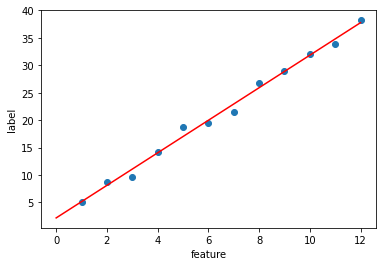

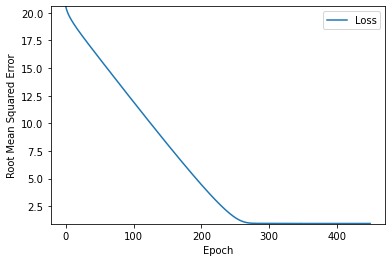

In [9]:
#@title Double-click to view a possible solution
learning_rate=0.01
epochs=450
my_batch_size=12 

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, 
                                                         my_label, epochs,
                                                         my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

# The loss curve suggests that the model does converge.

Task 3: Increase the learning rate
In Task 2, you increased the number of epochs to get the model to converge. Sometimes, you can get the model to converge more quickly by increasing the learning rate. However, setting the learning rate too high often makes it impossible for a model to converge. In Task 3, we've intentionally set the learning rate too high. Run the following code cell and see what happens.


C:\Users\snkty\anaconda3\envs\PythonData\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/500
1/1 [==============================] - 0s 423ms/step - loss: 247.9091 - root_mean_squared_error: 15.7451
Epoch 2/500
1/1 [==============================] - 0s 7ms/step - loss: 6734843.5000 - root_mean_squared_error: 2595.1577
Epoch 3/500
1/1 [==============================] - 0s 8ms/step - loss: 246.5569 - root_mean_squared_error: 15.7021
Epoch 4/500
1/1 [==============================] - 0s 6ms/step - loss: 1.7884 - root_mean_squared_error: 1.3373
Epoch 5/500
1/1 [==============================] - 0s 6ms/step - loss: 0.9026 - root_mean_squared_error: 0.9501
Epoch 6/500
1/1 [==============================] - 0s 6ms/step - loss: 0.8896 - root_mean_squared_error: 0.9432
Epoch 7/500
1/1 [==============================] - 0s 7ms/step - loss: 0.8884 - root_mean_squared_error: 0.9425
Epoch 8/500
1/1 [==============================] - 0s 8ms/step - loss: 0.8874 - root_mean_squared_error: 0.9420
Epoch 9/500
1/1 [==============================] - 0s 7ms/step - loss: 0.8866 - root_me

1/1 [==============================] - 0s 6ms/step - loss: 226403.5156 - root_mean_squared_error: 475.8188
Epoch 71/500
1/1 [==============================] - 0s 7ms/step - loss: 167089.1875 - root_mean_squared_error: 408.7654
Epoch 72/500
1/1 [==============================] - 0s 7ms/step - loss: 127474.6562 - root_mean_squared_error: 357.0359
Epoch 73/500
1/1 [==============================] - 0s 8ms/step - loss: 104750.0625 - root_mean_squared_error: 323.6512
Epoch 74/500
1/1 [==============================] - 0s 6ms/step - loss: 94541.6562 - root_mean_squared_error: 307.4763
Epoch 75/500
1/1 [==============================] - 0s 6ms/step - loss: 94127.0000 - root_mean_squared_error: 306.8012
Epoch 76/500
1/1 [==============================] - 0s 7ms/step - loss: 102633.9375 - root_mean_squared_error: 320.3653
Epoch 77/500
1/1 [==============================] - 0s 7ms/step - loss: 120423.0625 - root_mean_squared_error: 347.0203
Epoch 78/500
1/1 [==============================] - 0s 

Epoch 138/500
1/1 [==============================] - 0s 6ms/step - loss: 172936.1719 - root_mean_squared_error: 415.8560
Epoch 139/500
1/1 [==============================] - 0s 6ms/step - loss: 171610.6094 - root_mean_squared_error: 414.2591
Epoch 140/500
1/1 [==============================] - 0s 7ms/step - loss: 170188.2344 - root_mean_squared_error: 412.5388
Epoch 141/500
1/1 [==============================] - 0s 6ms/step - loss: 168963.3438 - root_mean_squared_error: 411.0515
Epoch 142/500
1/1 [==============================] - 0s 7ms/step - loss: 168154.8125 - root_mean_squared_error: 410.0668
Epoch 143/500
1/1 [==============================] - 0s 7ms/step - loss: 167875.2344 - root_mean_squared_error: 409.7258
Epoch 144/500
1/1 [==============================] - 0s 7ms/step - loss: 168124.7500 - root_mean_squared_error: 410.0302
Epoch 145/500
1/1 [==============================] - 0s 7ms/step - loss: 168803.6406 - root_mean_squared_error: 410.8572
Epoch 146/500
1/1 [=============

1/1 [==============================] - 0s 6ms/step - loss: 170514.7500 - root_mean_squared_error: 412.9343
Epoch 206/500
1/1 [==============================] - 0s 6ms/step - loss: 170494.5312 - root_mean_squared_error: 412.9098
Epoch 207/500
1/1 [==============================] - 0s 7ms/step - loss: 170460.9531 - root_mean_squared_error: 412.8692
Epoch 208/500
1/1 [==============================] - 0s 6ms/step - loss: 170422.0312 - root_mean_squared_error: 412.8220
Epoch 209/500
1/1 [==============================] - 0s 7ms/step - loss: 170386.1406 - root_mean_squared_error: 412.7786
Epoch 210/500
1/1 [==============================] - 0s 7ms/step - loss: 170360.1406 - root_mean_squared_error: 412.7471
Epoch 211/500
1/1 [==============================] - 0s 7ms/step - loss: 170348.1875 - root_mean_squared_error: 412.7326
Epoch 212/500
1/1 [==============================] - 0s 8ms/step - loss: 170351.3125 - root_mean_squared_error: 412.7364
Epoch 213/500
1/1 [===========================

1/1 [==============================] - 0s 7ms/step - loss: 170420.1562 - root_mean_squared_error: 412.8198
Epoch 273/500
1/1 [==============================] - 0s 9ms/step - loss: 170420.3750 - root_mean_squared_error: 412.8200
Epoch 274/500
1/1 [==============================] - 0s 9ms/step - loss: 170419.9531 - root_mean_squared_error: 412.8195
Epoch 275/500
1/1 [==============================] - 0s 7ms/step - loss: 170419.1719 - root_mean_squared_error: 412.8186
Epoch 276/500
1/1 [==============================] - 0s 7ms/step - loss: 170418.1562 - root_mean_squared_error: 412.8174
Epoch 277/500
1/1 [==============================] - 0s 6ms/step - loss: 170417.0469 - root_mean_squared_error: 412.8160
Epoch 278/500
1/1 [==============================] - 0s 7ms/step - loss: 170416.1719 - root_mean_squared_error: 412.8149
Epoch 279/500
1/1 [==============================] - 0s 6ms/step - loss: 170415.6719 - root_mean_squared_error: 412.8143
Epoch 280/500
1/1 [===========================

1/1 [==============================] - 0s 6ms/step - loss: 170417.6406 - root_mean_squared_error: 412.8167
Epoch 340/500
1/1 [==============================] - 0s 7ms/step - loss: 170417.6406 - root_mean_squared_error: 412.8167
Epoch 341/500
1/1 [==============================] - 0s 5ms/step - loss: 170417.6406 - root_mean_squared_error: 412.8167
Epoch 342/500
1/1 [==============================] - 0s 6ms/step - loss: 170417.6406 - root_mean_squared_error: 412.8167
Epoch 343/500
1/1 [==============================] - 0s 7ms/step - loss: 170417.6406 - root_mean_squared_error: 412.8167
Epoch 344/500
1/1 [==============================] - 0s 5ms/step - loss: 170417.6406 - root_mean_squared_error: 412.8167
Epoch 345/500
1/1 [==============================] - 0s 6ms/step - loss: 170417.6250 - root_mean_squared_error: 412.8167
Epoch 346/500
1/1 [==============================] - 0s 8ms/step - loss: 170417.5469 - root_mean_squared_error: 412.8166
Epoch 347/500
1/1 [===========================

1/1 [==============================] - 0s 7ms/step - loss: 170417.5781 - root_mean_squared_error: 412.8167
Epoch 407/500
1/1 [==============================] - 0s 7ms/step - loss: 170417.7344 - root_mean_squared_error: 412.8168
Epoch 408/500
1/1 [==============================] - 0s 6ms/step - loss: 170417.7500 - root_mean_squared_error: 412.8168
Epoch 409/500
1/1 [==============================] - 0s 6ms/step - loss: 170417.6719 - root_mean_squared_error: 412.8167
Epoch 410/500
1/1 [==============================] - 0s 7ms/step - loss: 170417.5469 - root_mean_squared_error: 412.8166
Epoch 411/500
1/1 [==============================] - 0s 8ms/step - loss: 170417.5469 - root_mean_squared_error: 412.8166
Epoch 412/500
1/1 [==============================] - 0s 7ms/step - loss: 170417.4219 - root_mean_squared_error: 412.8164
Epoch 413/500
1/1 [==============================] - 0s 8ms/step - loss: 170417.2656 - root_mean_squared_error: 412.8163
Epoch 414/500
1/1 [===========================

1/1 [==============================] - 0s 6ms/step - loss: 170417.4531 - root_mean_squared_error: 412.8165
Epoch 474/500
1/1 [==============================] - 0s 7ms/step - loss: 170417.4688 - root_mean_squared_error: 412.8165
Epoch 475/500
1/1 [==============================] - 0s 7ms/step - loss: 170417.5469 - root_mean_squared_error: 412.8166
Epoch 476/500
1/1 [==============================] - 0s 7ms/step - loss: 170417.5781 - root_mean_squared_error: 412.8167
Epoch 477/500
1/1 [==============================] - 0s 7ms/step - loss: 170417.6094 - root_mean_squared_error: 412.8167
Epoch 478/500
1/1 [==============================] - 0s 6ms/step - loss: 170417.6719 - root_mean_squared_error: 412.8167
Epoch 479/500
1/1 [==============================] - 0s 7ms/step - loss: 170417.6094 - root_mean_squared_error: 412.8167
Epoch 480/500
1/1 [==============================] - 0s 7ms/step - loss: 170417.5625 - root_mean_squared_error: 412.8166
Epoch 481/500
1/1 [===========================

C:\Users\snkty\anaconda3\envs\PythonData\lib\site-packages\numpy\core\_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


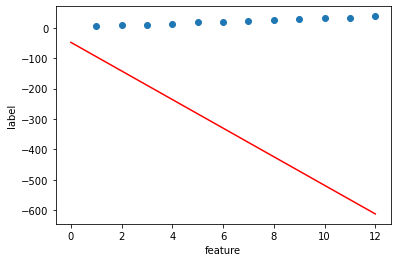

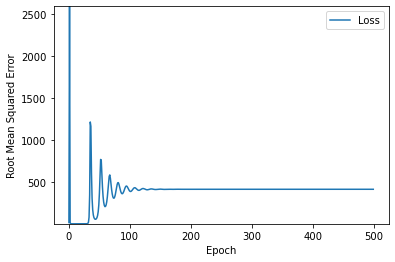

In [10]:
# Increase the learning rate and decrease the number of epochs.
learning_rate=100 
epochs=500 

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, 
                                                         my_label, epochs,
                                                         my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

The resulting model is terrible; the red line doesn't align with the blue dots. Furthermore, the loss curve oscillates like a roller coaster. An oscillating loss curve strongly suggests that the learning rate is too high.

Task 4: Find the ideal combination of epochs and learning rate
Assign values to the following two hyperparameters to make training converge as efficiently as possible:

learning_rate
epochs

C:\Users\snkty\anaconda3\envs\PythonData\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/70
1/1 [==============================] - 0s 394ms/step - loss: 998.5895 - root_mean_squared_error: 31.6005
Epoch 2/70
1/1 [==============================] - 0s 7ms/step - loss: 781.1069 - root_mean_squared_error: 27.9483
Epoch 3/70
1/1 [==============================] - 0s 8ms/step - loss: 648.1423 - root_mean_squared_error: 25.4586
Epoch 4/70
1/1 [==============================] - 0s 6ms/step - loss: 550.3370 - root_mean_squared_error: 23.4593
Epoch 5/70
1/1 [==============================] - 0s 6ms/step - loss: 472.8610 - root_mean_squared_error: 21.7454
Epoch 6/70
1/1 [==============================] - 0s 6ms/step - loss: 409.0075 - root_mean_squared_error: 20.2239
Epoch 7/70
1/1 [==============================] - 0s 7ms/step - loss: 355.0936 - root_mean_squared_error: 18.8439
Epoch 8/70
1/1 [==============================] - 0s 6ms/step - loss: 308.8477 - root_mean_squared_error: 17.5741
Epoch 9/70
1/1 [==============================] - 0s 8ms/step - loss: 268.7535 - root_

C:\Users\snkty\anaconda3\envs\PythonData\lib\site-packages\numpy\core\_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


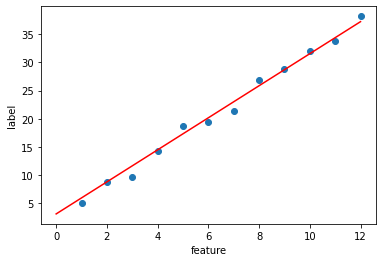

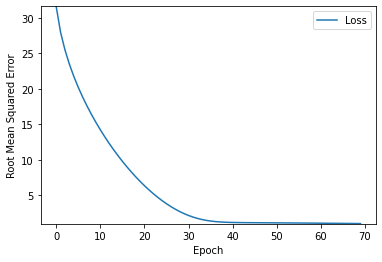

In [11]:
#@title Double-click to view a possible solution

learning_rate=0.14
epochs=70
my_batch_size=12

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, 
                                                         my_label, epochs,
                                                         my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

Task 5: Adjust the batch size
The system recalculates the model's loss value and adjusts the model's weights and bias after each iteration. Each iteration is the span in which the system processes one batch. For example, if the batch size is 6, then the system recalculates the model's loss value and adjusts the model's weights and bias after processing every 6 examples.

One epoch spans sufficient iterations to process every example in the dataset. For example, if the batch size is 12, then each epoch lasts one iteration. However, if the batch size is 6, then each epoch consumes two iterations.

It is tempting to simply set the batch size to the number of examples in the dataset (12, in this case). However, the model might actually train faster on smaller batches. Conversely, very small batches might not contain enough information to help the model converge.

Experiment with batch_size in the following code cell. What's the smallest integer you can set for batch_size and still have the model converge in a hundred epochs?

C:\Users\snkty\anaconda3\envs\PythonData\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/100
12/12 [==============================] - 0s 2ms/step - loss: 837.1354 - root_mean_squared_error: 28.9333
Epoch 2/100
12/12 [==============================] - 0s 2ms/step - loss: 585.5341 - root_mean_squared_error: 24.1978
Epoch 3/100
12/12 [==============================] - 0s 2ms/step - loss: 419.2419 - root_mean_squared_error: 20.4754
Epoch 4/100
12/12 [==============================] - 0s 2ms/step - loss: 293.8688 - root_mean_squared_error: 17.1426
Epoch 5/100
12/12 [==============================] - 0s 2ms/step - loss: 197.7823 - root_mean_squared_error: 14.0635
Epoch 6/100
12/12 [==============================] - 0s 2ms/step - loss: 120.3441 - root_mean_squared_error: 10.9701
Epoch 7/100
12/12 [==============================] - 0s 2ms/step - loss: 66.4393 - root_mean_squared_error: 8.1510
Epoch 8/100
12/12 [==============================] - 0s 2ms/step - loss: 30.3995 - root_mean_squared_error: 5.5136
Epoch 9/100
12/12 [==============================] - 0s 2ms/step - l

12/12 [==============================] - 0s 2ms/step - loss: 1.2236 - root_mean_squared_error: 1.1062
Epoch 73/100
12/12 [==============================] - 0s 2ms/step - loss: 1.1113 - root_mean_squared_error: 1.0542
Epoch 74/100
12/12 [==============================] - 0s 2ms/step - loss: 1.1301 - root_mean_squared_error: 1.0630
Epoch 75/100
12/12 [==============================] - 0s 2ms/step - loss: 1.1035 - root_mean_squared_error: 1.0505
Epoch 76/100
12/12 [==============================] - 0s 2ms/step - loss: 1.1658 - root_mean_squared_error: 1.0797
Epoch 77/100
12/12 [==============================] - 0s 2ms/step - loss: 1.0004 - root_mean_squared_error: 1.0002
Epoch 78/100
12/12 [==============================] - 0s 2ms/step - loss: 1.2379 - root_mean_squared_error: 1.1126
Epoch 79/100
12/12 [==============================] - 0s 2ms/step - loss: 1.1896 - root_mean_squared_error: 1.0907
Epoch 80/100
12/12 [==============================] - 0s 2ms/step - loss: 1.1130 - root_mean_

C:\Users\snkty\anaconda3\envs\PythonData\lib\site-packages\numpy\core\_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


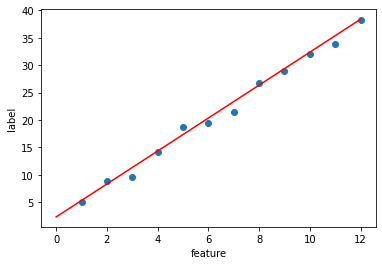

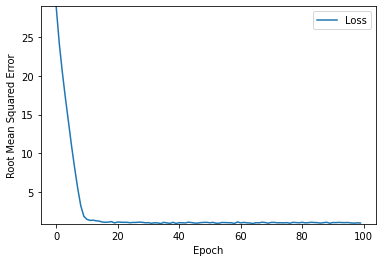

In [12]:
learning_rate=0.05
epochs=100
my_batch_size= 1 # Replace ? with an integer.

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, 
                                                        my_label, epochs,
                                                        my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

C:\Users\snkty\anaconda3\envs\PythonData\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/125
12/12 [==============================] - 0s 2ms/step - loss: 371.7707 - root_mean_squared_error: 19.2814
Epoch 2/125
12/12 [==============================] - 0s 2ms/step - loss: 219.1171 - root_mean_squared_error: 14.8026
Epoch 3/125
12/12 [==============================] - 0s 2ms/step - loss: 128.2193 - root_mean_squared_error: 11.3234
Epoch 4/125
12/12 [==============================] - 0s 2ms/step - loss: 67.1166 - root_mean_squared_error: 8.1925
Epoch 5/125
12/12 [==============================] - 0s 2ms/step - loss: 30.4390 - root_mean_squared_error: 5.5172
Epoch 6/125
12/12 [==============================] - 0s 2ms/step - loss: 10.4426 - root_mean_squared_error: 3.2315
Epoch 7/125
12/12 [==============================] - 0s 2ms/step - loss: 2.7575 - root_mean_squared_error: 1.6606
Epoch 8/125
12/12 [==============================] - 0s 2ms/step - loss: 1.2649 - root_mean_squared_error: 1.1247
Epoch 9/125
12/12 [==============================] - 0s 2ms/step - loss: 1.1

12/12 [==============================] - 0s 2ms/step - loss: 1.2687 - root_mean_squared_error: 1.1264
Epoch 72/125
12/12 [==============================] - 0s 2ms/step - loss: 1.0289 - root_mean_squared_error: 1.0144
Epoch 73/125
12/12 [==============================] - 0s 2ms/step - loss: 1.2533 - root_mean_squared_error: 1.1195
Epoch 74/125
12/12 [==============================] - 0s 2ms/step - loss: 1.1919 - root_mean_squared_error: 1.0918
Epoch 75/125
12/12 [==============================] - 0s 1ms/step - loss: 1.1629 - root_mean_squared_error: 1.0784
Epoch 76/125
12/12 [==============================] - 0s 1ms/step - loss: 1.0925 - root_mean_squared_error: 1.0452
Epoch 77/125
12/12 [==============================] - 0s 1ms/step - loss: 1.1527 - root_mean_squared_error: 1.0736
Epoch 78/125
12/12 [==============================] - 0s 2ms/step - loss: 1.2053 - root_mean_squared_error: 1.0979
Epoch 79/125
12/12 [==============================] - 0s 1ms/step - loss: 1.0630 - root_mean_

C:\Users\snkty\anaconda3\envs\PythonData\lib\site-packages\numpy\core\_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


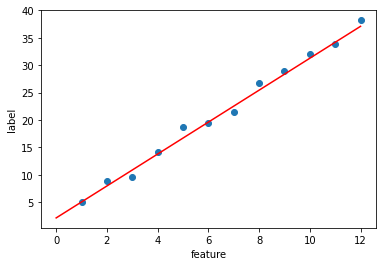

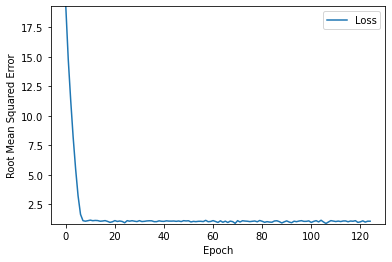

In [13]:
#@title Double-click to view a possible solution

learning_rate=0.05
epochs=125
my_batch_size=1 # Wow, a batch size of 1 works!

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, 
                                                         my_label, epochs,
                                                         my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)
